### Predictive analysis refer to feature Analysis keeping in acount of prediction variable(output)

#### Uni-Variate Analysis(checking which feature having more information or variablity interms of output or to distinguish output) 
#### for that we can use the classic statistics tests (chi-square,ANova,person,spearman etcc..,) or models itself or from the visualization of each variable
#### Bi-variate Analysis (using plots of two variables we can)
#### Multivariate Analysis (means applying model itself or you can check visually by applying t-sne or pca to know data with the features that we have are sufficient to distinguish our output variable)

# Predictive Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [2]:
#lets firt read data
train=pd.read_csv("train.csv")
train.head(1)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,Combined_asset_value
0,1676,5.0,Not Graduate,No,7900000,29900000,6,568,5800000,13900000,15900000,8700000,Approved,44300000


##### Now lets try to find the constant features i.e(variance=0) which will be having no information

In [3]:
numerical_columns=train.describe().columns
var_th=VarianceThreshold(threshold=0)
var_th.fit(train[numerical_columns])

VarianceThreshold(threshold=0)

In [4]:
constant_columns=[column for column in numerical_columns if column not in numerical_columns[var_th.get_support()]]
constant_columns #there are no constant columns here

[]

In [5]:
numerical_columns[var_th.get_support()] #var_th.get_support() this gives columns whose variance!=0

Index(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'Combined_asset_value'],
      dtype='object')

#   Uni variate Analysis

#### first lets apply classic statistics and finout the best features then we basically see visually for that features

In [6]:
# since our output i categorical variable (binary classification) lets convert to 0 and 1
train["loan_status"]=train["loan_status"].map({" Approved":1," Rejected":0})

In [7]:
# lets select the best 5 numerical variables with respect to output (numerical vs categorical) (we use ANOVA)
f_values=[]
for i in train.describe().columns:
    if i!="loan_status":
        f_statistic,p_value=f_classif(np.array(train[i]).reshape(-1,1),np.array(train["loan_status"]))
        f_values.append((i,f_statistic[0])) #since it gives array we need value so we take [0] index value
        print(i,f_statistic,p_value) #f-statistic means calculated value #p-value means probability of ocuuring under null hypothesis
print(f_values)

loan_id [2.31082416] [0.12856833]
no_of_dependents [1.59982801] [0.20601374]
income_annum [1.48132678] [0.223651]
loan_amount [0.32340795] [0.56960408]
loan_term [47.80353903] [5.59749658e-12]
cibil_score [5029.36879647] [0.]
residential_assets_value [1.42366363] [0.23288407]
commercial_assets_value [0.27327508] [0.60117709]
luxury_assets_value [1.06724304] [0.30164203]
bank_asset_value [0.60677996] [0.43605667]
Combined_asset_value [0.80428802] [0.36987751]
[('loan_id', 2.3108241620737013), ('no_of_dependents', 1.5998280056464598), ('income_annum', 1.4813267767944642), ('loan_amount', 0.3234079539803505), ('loan_term', 47.80353903340312), ('cibil_score', 5029.368796472968), ('residential_assets_value', 1.4236636264598475), ('commercial_assets_value', 0.2732750816494857), ('luxury_assets_value', 1.0672430354943043), ('bank_asset_value', 0.606779964422256), ('Combined_asset_value', 0.8042880192569595)]


In [8]:
#lets sort the array of f_values
f_values.sort(key=lambda x:x[1],reverse=True) #if reverse =True then decending order
f_values

[('cibil_score', 5029.368796472968),
 ('loan_term', 47.80353903340312),
 ('loan_id', 2.3108241620737013),
 ('no_of_dependents', 1.5998280056464598),
 ('income_annum', 1.4813267767944642),
 ('residential_assets_value', 1.4236636264598475),
 ('luxury_assets_value', 1.0672430354943043),
 ('Combined_asset_value', 0.8042880192569595),
 ('bank_asset_value', 0.606779964422256),
 ('loan_amount', 0.3234079539803505),
 ('commercial_assets_value', 0.2732750816494857)]

# conclusion 

#### From the above we can definitely tell that "Cibil_score" and "loan_term" plays an important role in predicting the output (we have high variablity in this features) (these are top 2)
#### "no_of_dependents","loan_id","loan_amount","luxury_asset_value","income_annum" also has impact
#### other features has variability but have less

## now lets visualise those variables whose f_value >=1 lets see visually

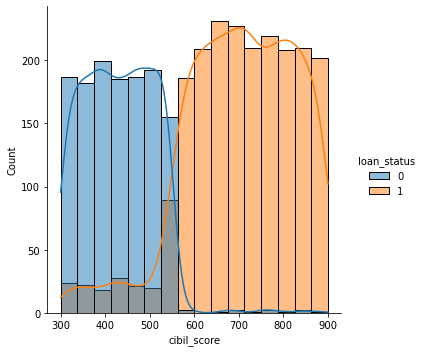

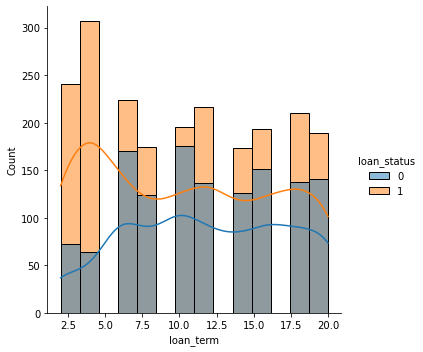

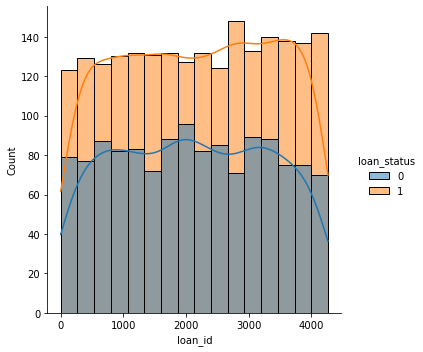

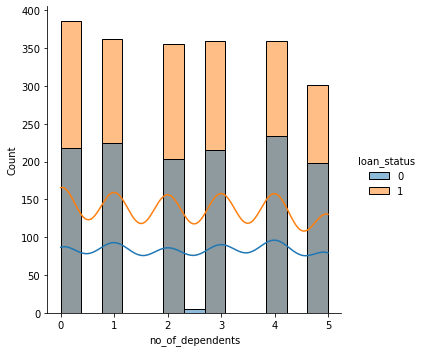

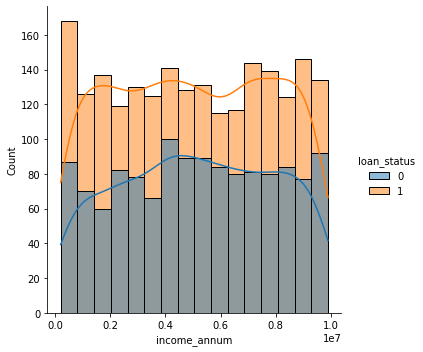

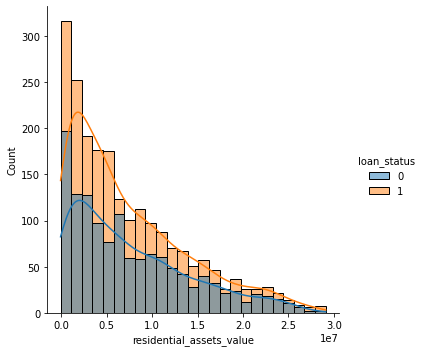

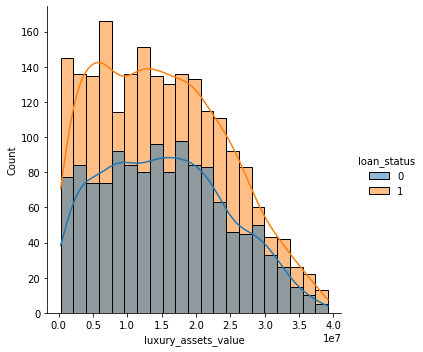

In [9]:
for i in f_values:
    if i[1]>=1: 
        sns.displot(data=train,x=i[0],hue="loan_status",kde=True)

### From the above we can easily tell that cibil_score helps in predicting output value

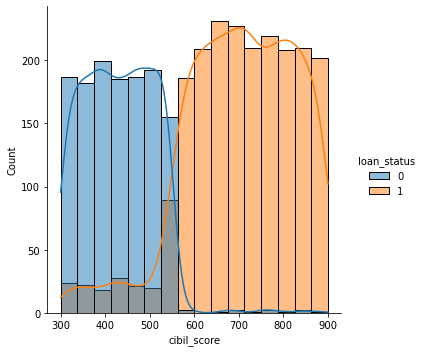

In [10]:
sns.displot(data=train,x="cibil_score",hue="loan_status",kde=True)

<AxesSubplot:xlabel='cibil_score', ylabel='Proportion'>

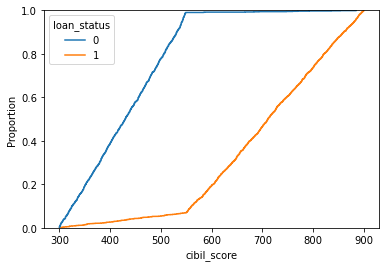

In [11]:
sns.ecdfplot(data=train,x="cibil_score",hue="loan_status")

# Conclusions
#### from the cdf plot we can say 100 percent of time whose cibil score is less than 550 will be rejected
#### cibil_score>550 will be approved
#### hence with cibil score only we can build a model
#### note :- some people gets approved if cibil_score is <550 also that is ok it depends on other parameters as well

## Bivariate Analysis

## lets draw a pair plot for top 5 variables

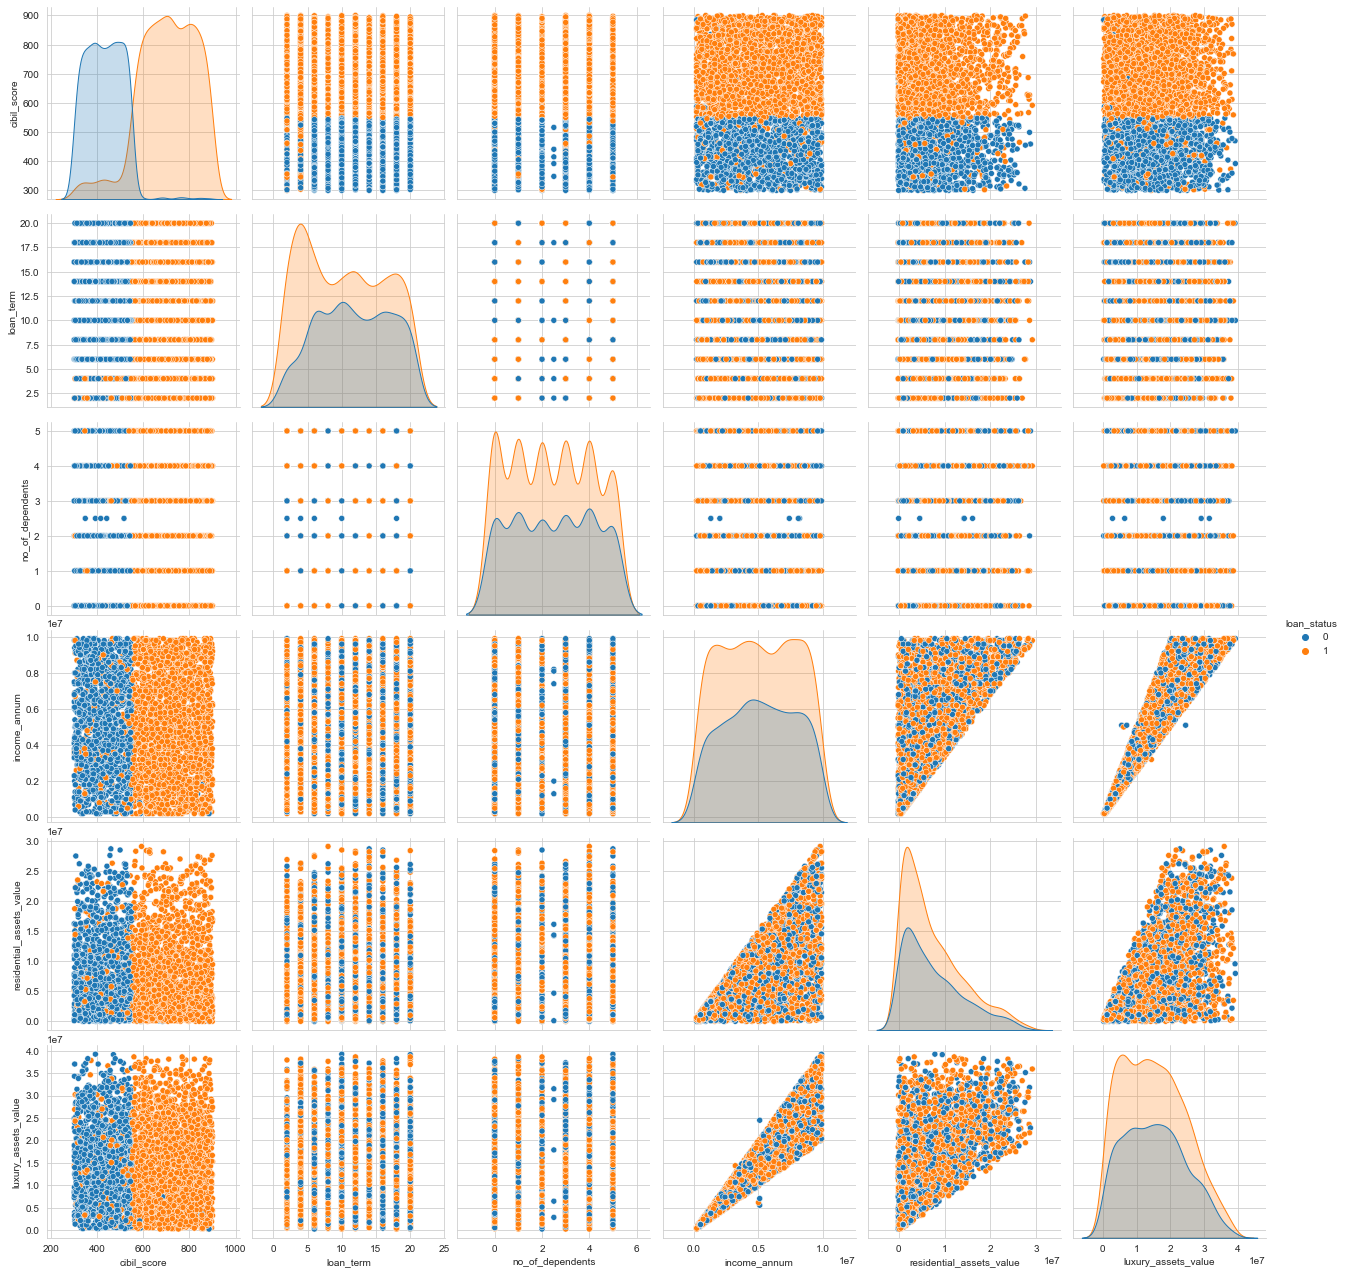

In [12]:
L=[]
for i in f_values:
    if i[1]>=1 and i[0]!="loan_id":
        L.append(i[0])
L.append("loan_status")
plt.close();
sns.set_style("whitegrid");
sns.pairplot(train.loc[:,L], hue="loan_status", height=3);
plt.show()

# Conclusion 
### from the above we can tell cibil_score with income_annum,luxury_Asset_value,loan_amount seperates our output label

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [14]:
### Multi-Variate Analysis lets do the t-sne (which preserves the distances in low dimensions)
### before applying t-sne it is important to standardize the data since it is based on distance (whenevr it is on distance) we need to standardize the data

In [15]:
train.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,Combined_asset_value
0,1676,5.0,Not Graduate,No,7900000,29900000,6,568,5800000,13900000,15900000,8700000,1,44300000
1,1165,0.0,Not Graduate,Yes,9600000,34000000,12,710,23800000,10300000,38100000,7800000,1,80000000
2,193,1.0,Graduate,No,800000,2900000,8,682,2200000,1100000,2900000,700000,1,6900000
3,911,2.0,Graduate,Yes,4900000,13100000,18,754,8200000,3300000,16500000,7200000,1,35200000
4,568,5.0,Graduate,Yes,3000000,11100000,12,441,8500000,2500000,7300000,2000000,0,20300000


In [16]:
standard_data=StandardScaler().fit_transform(train[train.describe().columns])
standard_data

array([[-0.38921964,  1.51748298,  1.00765875, ...,  1.15914603,
         0.78203703,  0.6000303 ],
       [-0.80665818, -1.43401668,  1.61231011, ...,  0.88085885,
         0.78203703,  2.426846  ],
       [-1.60069002, -0.84371675, -1.51764987, ..., -1.31451785,
         0.78203703, -1.31377662],
       ...,
       [ 1.0362799 ,  0.92718305,  1.25663284, ...,  0.13875968,
        -1.27871182,  1.17314895],
       [ 1.0370968 , -0.25341681,  0.68754921, ...,  1.43743322,
        -1.27871182,  0.09343435],
       [ 1.03791371,  0.92718305,  0.40300739, ..., -0.10860671,
         0.78203703,  0.666553  ]])

In [17]:
model=TSNE(n_components=2,random_state=1) #default perplexity=30 default_learning_rate=200,default_iteration_for_optimization=1000
tsne_data=model.fit_transform(standard_data)
tsne_data

array([[ -6.7340665 ,  19.880472  ],
       [-15.246197  ,  40.255753  ],
       [ -0.55259883, -45.492085  ],
       ...,
       [ 36.141636  ,  30.288843  ],
       [ 37.02071   ,  15.786239  ],
       [-19.016478  ,  14.472028  ]], dtype=float32)

In [19]:
tsne_df=pd.DataFrame(np.hstack((tsne_data,np.array(train["loan_status"]).reshape(-1,1))),columns=["Dim_1","Dim_2","loan_status"])
tsne_df.head()

,Dim_1,Dim_2,loan_status
0,-6.734066,19.880472,1.0
1,-15.246197,40.255753,1.0
2,-0.552599,-45.492085,1.0
3,-37.124443,-1.532511,1.0
4,63.578163,5.948839,0.0


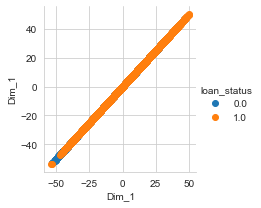

In [26]:
sns.FacetGrid(data=tsne_df,hue="loan_status").map(plt.scatter,"Dim_1","Dim_1").add_legend()

In [21]:
tsne_data.shape

(3423, 2)

#### Conclusions
#### from this we can tell data is non linearly seperable we can apply linear models we will get errors as well as non linear models  with minor errors we need to select the best
#### but if data is non linearly seperable the we should use non linear modles like Decision trees,SVM with RBF kernel that behave like k-nn,RF or GBDT or K-nn or Mlps
#### if data is non linear then we have to do feature transform to apply linear model but svm with kernal and mlps internally do feature transform impliciitly for us
#### RF and GBDT uses DT internally so it will try to fit axes parallel hyperplanes and RF overcomes overfit and GBDT overcomes underfit problem

# Lets find out which categorical variable have more impact on our output variable

##### we use chi-Square test (classical method) to know which feature is best in categorical data with the categorical data
##### null hypothesis of chi2 is no relationship between variables (features are independent)

In [24]:
categorical_variables=[i for i in train.columns if i not in train.describe().columns]
categorical_variables

['education', 'self_employed']

In [26]:
for i in categorical_variables:
    d={}
    vari=0
    for j in train[i].unique(): #this code is to create dictionary with unqiue values to numerical label
        d[j]=vari
        vari=vari+1
    print(d)

{' Not Graduate': 0, ' Graduate': 1}
{' No': 0, ' Yes': 1}


In [27]:
chi2_values=[]
for i in categorical_variables:
    d={}
    vari=0
    for j in train[i].unique(): #this code is to create dictionary with unqiue values to numerical label
        d[j]=vari
        vari=vari+1
    chi_statistic,p_value_chi=chi2(np.array(train[i].map(d)).reshape(-1,1),np.array(train["loan_status"]).reshape(-1,1))
    chi2_values.append((i,chi_statistic,p_value_chi))
print(chi2_values)

[('education', array([0.06526386]), array([0.79836172])), ('self_employed', array([0.01591779]), array([0.89960074]))]


# conclusion is 
#### p-value is greater that is probalbilty of obervation under null hypothesis is 98% for self_employed and 79% for education
#### null hypothesis is features are independent(no relationship)
#### these two features for our output variable are not useful in prediction output
#### from this if we want to select any one then we can go with education